(array([9.32246034e-12, 9.27751090e-12, 9.14309254e-12, ...,
        7.81249859e-03, 7.81249859e-03, 7.81249859e-03]),
 array([0.00000000e+00, 1.95312500e+00, 3.90625000e+00, ...,
        7.99609375e+03, 7.99804688e+03, 8.00000000e+03]),
 <matplotlib.lines.Line2D at 0x27050d85990>)

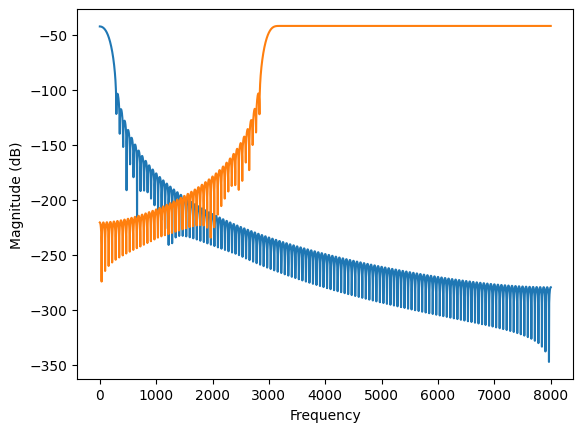

In [1]:
import numpy as np
import scipy.signal as sps

import ffmpegio as ff

from matplotlib import pyplot as plt

from straight_pitch.straight_pitch import zplotcpower, cleaninglownoise

fs, xin = ff.audio.read("../test/vaiueo2d.wav", sample_fmt="dbl", ac=1, ar=16000)
xin = xin[:, 0]  # make it 1D

flm: float = 8e-3
nfl = round(flm * fs)
# w = sps.get_window("hann", 2 * nfl + 1)
# w = w / w.sum()
w = sps.firwin(2 * nfl + 1, 1 / flm, pass_zero="lowpass", fs=fs, window="hann")

fhp: float = 3e3
# b = sps.firwin(2 * nfl + 1, [0.0001, fhp / (fs / 2)])
# b[nfl] -= -1
b = sps.firwin(2 * nfl + 1, fhp, pass_zero="highpass", fs=fs, window="hann")

plt.magnitude_spectrum(w, fs, pad_to=1024 * 8, scale="dB")
plt.magnitude_spectrum(b, fs, pad_to=1024 * 8, scale="dB")
# plt.xlim(0,200)
# plt.ylim(-60,-40)

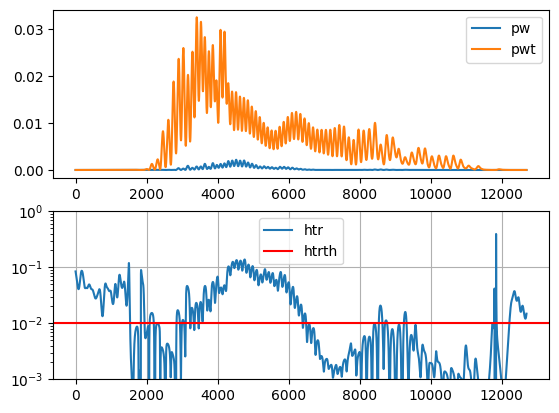

In [11]:
x = cleaninglownoise(xin, fs, 40)

# plt.magnitude_spectrum(x**2, fs, pad_to=8192 * 4, scale="dB")

htr, pw, pwt = zplotcpower(x, 125 / fs, 3000 / fs)

plt.subplots(2, 1)
plt.subplot(2, 1, 1)
plt.plot(pw, label="pw")
plt.plot(pwt, label="pwt")
plt.legend()
plt.subplot(2, 1, 2)
plt.semilogy(htr, label="htr")
plt.axhline(10**(-20/10),c='r',label='htrth')
plt.legend()
plt.ylim(0.001,1)
plt.grid()